In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Rejection Region Aprroch**

## Q1: 
**The silicon wafers' target thickness of the integrated circuit is 245 m.
A sample of 50 wafers is chosen, and the thickness of each one is determined, resulting in a sample mean thickness of 246.18 m and a sample standard deviation of 3.60 m.
Does this data suggest that**

Degree of freedom : 49
t_statistics : 2.3177388938892527
t_critical : 2.0095752371292397
Reject the null hypothesis: The mean thickness is different from 245 μm.


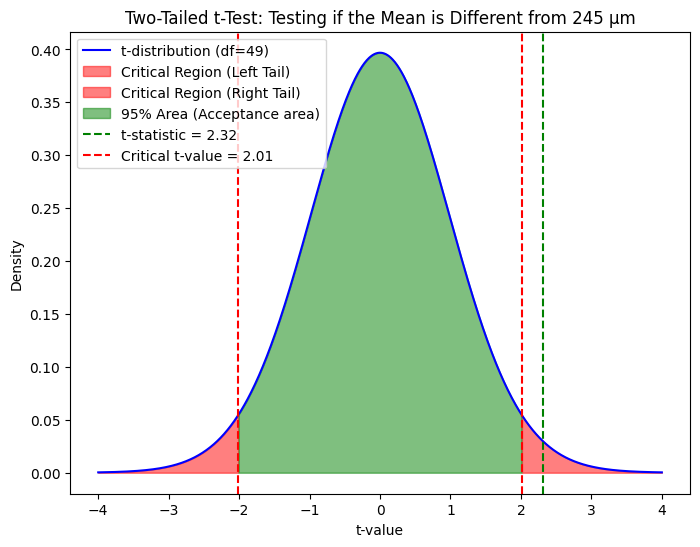

In [52]:
# Code
mu = 245
sample_mean = 246.18
s= 3.6 # sample std dev
n_sample= 50
degreeofFreedom= n_sample -1
alpha = 0.05 #5% level of significance

# calculate the test stats
t_statistics = (sample_mean - mu) / (s/np.sqrt(n_sample))
print(f"Degree of freedom : {degreeofFreedom}")
print(f"t_statistics : {t_statistics}")

# calcualte the t_critical
t_critical = stats.t.ppf(1- (alpha/2), degreeofFreedom) # two tailed
print(f"t_critical : {t_critical}")

## Decision
if abs(t_statistics) > t_critical:
    print("Reject the null hypothesis: The mean thickness is different from 245 μm.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference from 245 μm.")


# Create the plot
x = np.linspace(-4, 4, 1000)  # Range for plotting the t-distribution
y = stats.t.pdf(x, degreeofFreedom)  # Probability density function for t-distribution with df degrees of freedom

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="t-distribution (df=49)", color='blue')

# Highlight the critical regions (both left and right tails)
plt.fill_between(x, y, where=(x <= -t_critical), color='red', alpha=0.5, label="Critical Region (Left Tail)")
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.5, label="Critical Region (Right Tail)")
plt.fill_between(x, y, where=(x < t_critical) & (x > -t_critical ), color='green', alpha=0.5, label="95% Area (Acceptance area)")
# Mark the t-statistic and critical t-value
plt.axvline(t_statistics, color='green', linestyle='--', label=f"t-statistic = {t_statistics:.2f}")
plt.axvline(t_critical, color='red', linestyle='--', label=f"Critical t-value = {t_critical:.2f}")
plt.axvline(-t_critical, color='red', linestyle='--')

# Labels and title
plt.title("Two-Tailed t-Test: Testing if the Mean is Different from 245 μm")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend(loc="best")

# Show the plot
plt.show()

## **Q2:**

Suppose a factory claims that the average weight of the bags of sugar it produces is 10 kg. A consumer group believes that the bags are underweight. To test this claim, a sample of 30 bags is taken, and the sample mean weight is found to be 9.8 kg with a sample standard deviation of 0.5 kg.

We want to test if the sample data provides sufficient evidence to conclude that the average weight of the bags is different from 10 kg

Degree of freedom : 29
t_statistics : -2.1908902300206567
t_critical : -1.6991270265334972
Reject the null hypothesis: 


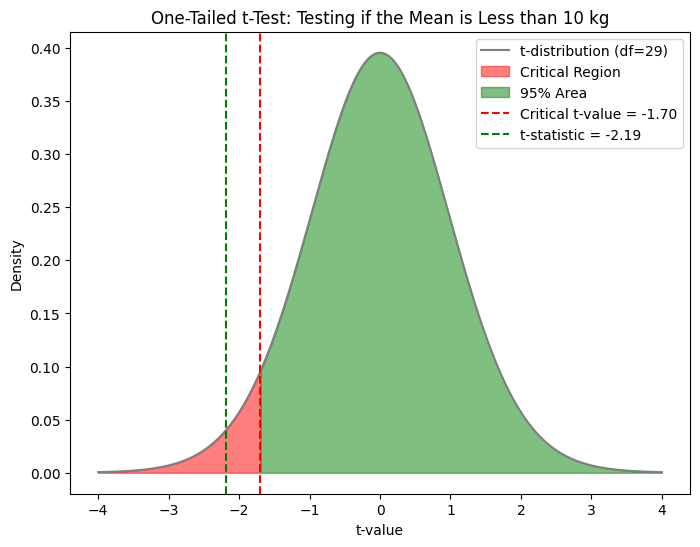

In [47]:
mu = 10
n = 30
sample_mean = 9.8
sample_std= 0.5
# degree of freedom = n-1 
degreeofFreedom = 30-1
alpha= 0.05

# one tail test
# H0: mu = 10
# H1: mu < 10 

# t Statistics
t_statistics = (sample_mean - mu) / ( (sample_std/np.sqrt(n)))

print(f"Degree of freedom : {degreeofFreedom}")
print(f"t_statistics : {t_statistics}")

# t_critical finding
t_critical = stats.t.ppf(1- alpha, degreeofFreedom) # one tailed
t_critical = -t_critical  # should be negative as we're looking at left tail
print(f"t_critical : {t_critical}")

# Decision
if abs(t_statistics) > t_critical:
    print("Reject the null hypothesis: ")
else:
    print("Fail to reject the null hypothesis")


# Create the plot
x = np.linspace(-4, 4, 1000)  # Range for plotting the t-distribution
y = stats.t.pdf(x, 29)  # Probability density function for t-distribution with df degrees of freedom

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="t-distribution (df=29)", color='grey')

# Highlight the critical region (left tail)
plt.fill_between(x, y, where=(x <= t_critical), color='red', alpha=0.5, label="Critical Region")
plt.fill_between(x, y, where=(x > t_critical), color='green', alpha=0.5, label="95% Area")

# Mark the critical t-value and the test statistic
plt.axvline(t_critical, color='red', linestyle='--', label=f"Critical t-value = {t_critical:.2f}")
plt.axvline(t_statistics, color='green', linestyle='--', label=f"t-statistic = {t_statistics:.2f}")

# Labels and title
plt.title("One-Tailed t-Test: Testing if the Mean is Less than 10 kg")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend(loc="best")
# plt.grid(True)

# Show the plot
plt.show()

## **Q4**
A company claims that their light bulbs have an average lifespan of 800 hours. A consumer group wants to test if the bulbs last less than 800 hours. To do this, they randomly select 100 bulbs and find that the sample mean lifespan is 780 hours with a population standard deviation of 50 hours.

The consumer group will perform a one-tailed Z-test to determine if the average lifespan of the bulbs is less than the claimed 800 hours.

Degree of freedom : 29
t_statistics : -4.0
Reject the null hypothesis: 


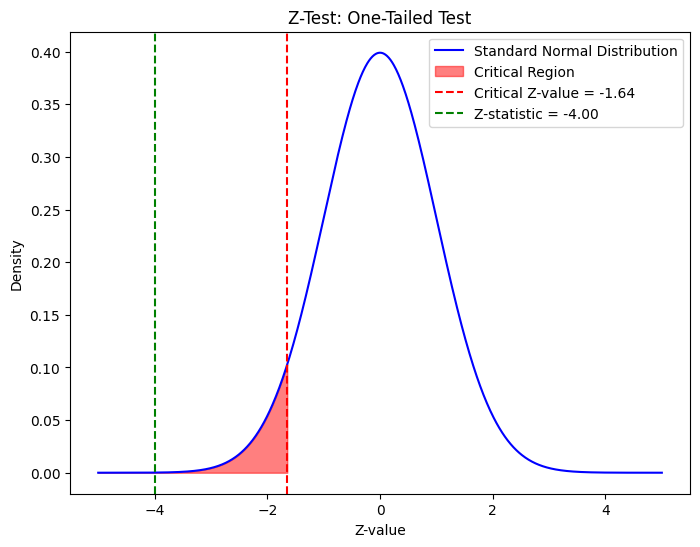

In [45]:
mu = 800
N = 100
sample_mean = 780
population_std= 50 #Z_test
alpha= 0.05

# Z statistic calculation 
z_statistics = (sample_mean - mu) / (population_std/np.sqrt(N))
print(f"Degree of freedom : {degreeofFreedom}")
print(f"t_statistics : {z_statistics}")

#Z critical value calculation
z_critical = stats.norm.ppf(alpha) #one_tailed

# Decision
# Decision
if abs(z_statistics) > abs(z_critical):
    print("Reject the null hypothesis: ")
else:
    print("Fail to reject the null hypothesis")


# Create the plot
x = np.linspace(-5, 5, 1000)  # Range for plotting the normal distribution
y = stats.norm.pdf(x, 0, 1)  # Probability density function for standard normal distribution

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Highlight the area for the critical region
plt.fill_between(x, y, where=(x <= z_critical), color='red', alpha=0.5, label="Critical Region")

# Mark the critical Z-value and the test statistic
plt.axvline(z_critical, color='red', linestyle='--', label=f"Critical Z-value = {z_critical:.2f}")
plt.axvline(z_statistics, color='green', linestyle='--', label=f"Z-statistic = {z_statistics:.2f}")

# Labels and title
plt.title("Z-Test: One-Tailed Test")
plt.xlabel("Z-value")
plt.ylabel("Density")
plt.legend(loc="best")
# plt.grid(True)

# Show the plot
plt.show()

# **P Value Approch**

## Q1: 

A company claims that their light bulbs have an average lifespan of 800 hours. A consumer group wants to test if the bulbs last less than 800 hours. To do this, they randomly select 100 bulbs and find that the sample mean lifespan is 780 hours with a population standard deviation of 50 hours.

The consumer group will perform a one-tailed Z-test to determine if the average lifespan of the bulbs is less than the claimed 800 hours.

Degree of freedom : 49
t_statistics : -4.0
Left tail test P Value 3.167124183311986e-05
Reject the null hypothesis: The average lifespan of the bulbs is less than 800 hours.


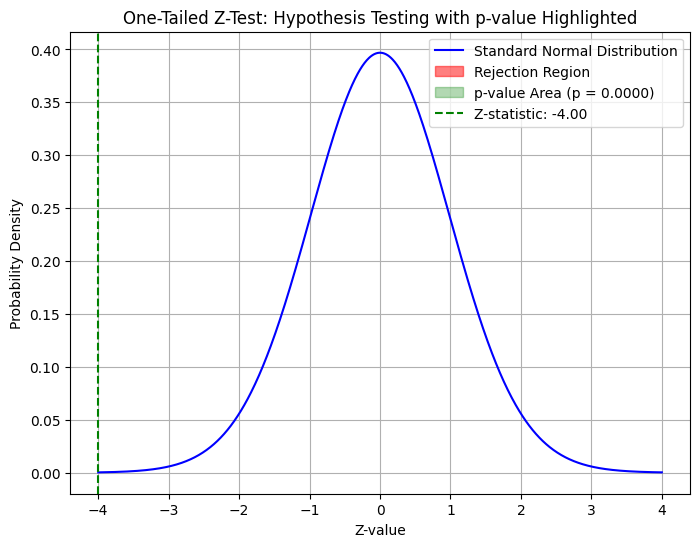

In [59]:
mu = 800
N = 100
sample_mean = 780
population_std= 50 #Z_test
alpha= 0.05

# Z statistic calculation 
z_statistics = (sample_mean - mu) / (population_std/np.sqrt(N))
print(f"Degree of freedom : {degreeofFreedom}")
print(f"t_statistics : {z_statistics}")

# find the P value 
# Step 2: Find the p-value for a one-tailed test
p_value = stats.norm.cdf(z_statistics)  # CDF for left-tailed test
print(f"Left tail test P Value {p_value}")


# Decision
if p_value < alpha:
    print("Reject the null hypothesis: The average lifespan of the bulbs is less than 800 hours.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average lifespan is less than 800 hours.")


##Plot
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='b')

# Highlight the rejection region (shaded area)
plt.fill_between(x, y, where=(x < z_statistics), color='r', alpha=0.5, label="Rejection Region")

# Highlight the p-value area (area to the left of Z-statistic)
plt.fill_between(x, y, where=(x <= z_statistics), color='g', alpha=0.3, label=f"p-value Area (p = {p_value:.4f})")

# Add Z-statistic line
plt.axvline(x=z_statistics, color='g', linestyle='--', label=f"Z-statistic: {z_statistics:.2f}")

# Add labels and title
plt.title("One-Tailed Z-Test: Hypothesis Testing with p-value Highlighted")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Q2
S"uppose a company claims that the average weight of a new product is 50 kg. A researcher wants to test if the average weight of the product is actually greater than 50 kg, using a sample of 30 products. The sample mean weight is found to be 52 kg with a population standard deviation of 4 kg.

We will perform a right-tailed Z-test to determine if the sample mean is significantly greater than the population mean (50 kg).


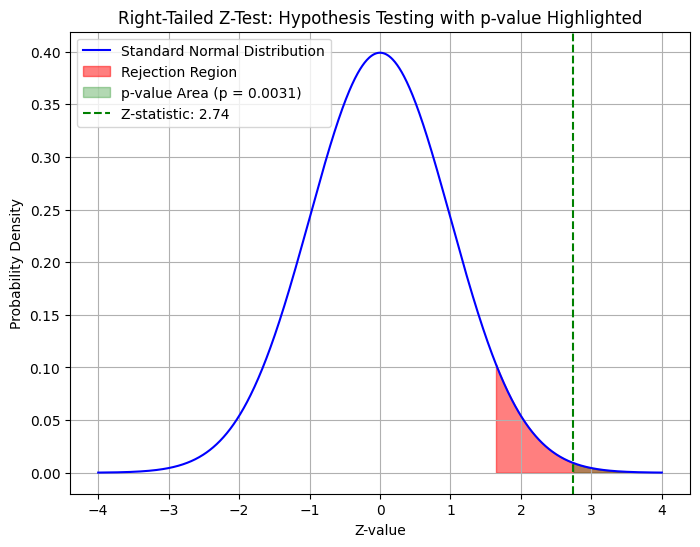

Z-statistic: 2.7386127875258306
p-value: 0.0030849496602720627
Reject the null hypothesis: The average weight is greater than 50 kg.


In [65]:
# Given data
population_mean = 50  # Claimed mean weight in kg
sample_mean = 52  # Sample mean weight in kg
population_std_dev = 4  # Population standard deviation in kg
sample_size = 30  # Sample size
alpha = 0.05  # Significance level

# Step 1: Calculate the Z-statistic
z_statistic = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

# Step 2: Find the p-value for a right-tailed test
p_value = 1 - stats.norm.cdf(z_statistic)  # Right-tailed p-value

# Optional Just for plotting
#Z critical value calculation
z_critical = stats.norm.ppf(alpha) #one_tailed



#### ***************************************************** plotting curves *******************************************************
# Step 3: Plot the distribution
x = np.linspace(-4, 4, 1000)  # Range for the normal distribution
y = stats.norm.pdf(x)  # Normal distribution PDF

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='b')

# Highlight the rejection region (shaded area for right tail)
plt.fill_between(x, y, where=(x >= -z_critical), color='r', alpha=0.5, label="Rejection Region")

# Highlight the p-value area (area to the right of Z-statistic)
plt.fill_between(x, y, where=(x >= z_statistic), color='g', alpha=0.3, label=f"p-value Area (p = {p_value:.4f})")

# Add Z-statistic line
plt.axvline(x=z_statistic, color='g', linestyle='--', label=f"Z-statistic: {z_statistic:.2f}")

# Add labels and title
plt.title("Right-Tailed Z-Test: Hypothesis Testing with p-value Highlighted")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Print the result
print(f"Z-statistic: {z_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The average weight is greater than 50 kg.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average weight is greater than 50 kg.")



# **Single Sample t-test**

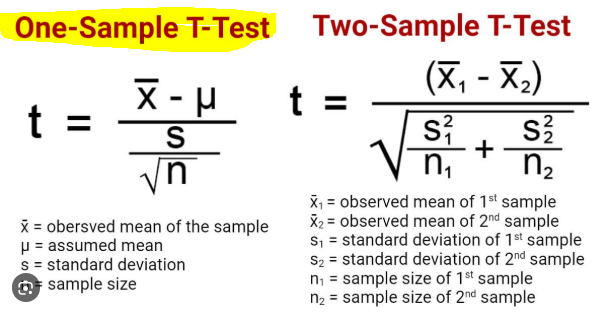

**Assumptions:**

    1 ) sample should be normally distributed (n>=30)
    2 ) Independent Observation
    3 ) Data should be randomely sampled
    4 ) Population std dev should be unknown

## Q: Compare the company claim weight (pop mean) is similar to sample mean

T statitstics : 4.69336006228724
P Value : 5.9444748344738786e-05


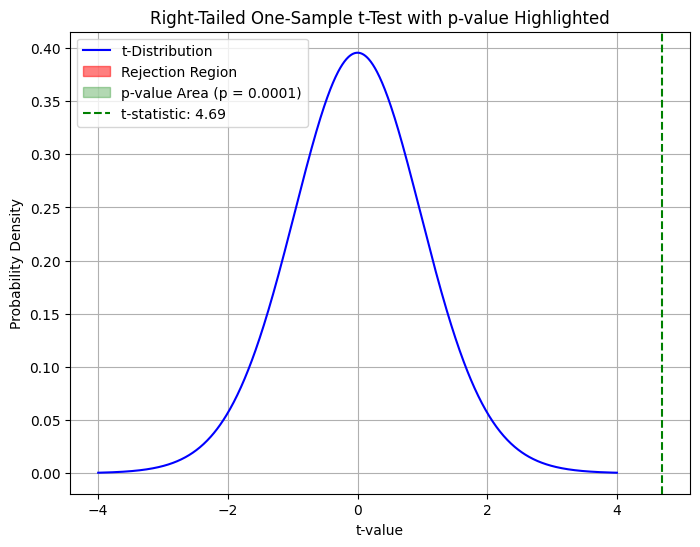

t-statistic: 4.69336006228724
p-value: 5.9444748344738786e-05
Reject the null hypothesis: The average weight is greater than 50 kg.


In [69]:
# Given data
population_mean = 50  # Claimed mean weight in kg
sample_mean = 52  # Sample mean weight in kg
sample_std_dev = 4  # Sample standard deviation in kg
sample_size = 30  # Sample size
alpha = 0.05  # Significance level

# Simulating the sample data (assuming normal distribution)
np.random.seed(0)  # For reproducibility
sample_data = np.random.normal(loc=sample_mean, scale=sample_std_dev, size=sample_size)

# Step 1: Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

print(f"T statitstics : {t_statistic}")
print(f"P Value : {p_value}")

## *************************************** Just for Plotting *******************************************

# Step 2: Plot the distribution
x = np.linspace(-4, 4, 1000)  # Range for the normal distribution
y = stats.t.pdf(x, df=sample_size - 1)  # t-distribution PDF

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="t-Distribution", color='b')

# Highlight the rejection region (shaded area for right tail)
plt.fill_between(x, y, where=(x >= t_statistic), color='r', alpha=0.5, label="Rejection Region")

# Highlight the p-value area (area to the right of t-statistic)
plt.fill_between(x, y, where=(x >= t_statistic), color='g', alpha=0.3, label=f"p-value Area (p = {p_value:.4f})")

# Add t-statistic line
plt.axvline(x=t_statistic, color='g', linestyle='--', label=f"t-statistic: {t_statistic:.2f}")

# Add labels and title
plt.title("Right-Tailed One-Sample t-Test with p-value Highlighted")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Print the result
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: The average weight is greater than 50 kg.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average weight is greater than 50 kg.")




In [72]:
## Another way
# Given data
population_mean = 50  # Claimed mean weight in kg
sample_mean = 52  # Sample mean weight in kg
sample_std_dev = 4  # Sample standard deviation in kg
sample_size = 30  # Sample size
alpha = 0.05  # Significance level
degreeoffreedom= sample_size - 1 

## t stat 
# Step 1: Calculate the Z-statistic
t_statistic = (sample_mean - population_mean) / (sample_std_dev / np.sqrt(sample_size))
print(f"t statistics : {t_statistic}")

# Step 2: Find the p-value for a right-tailed test
p_value = 1- stats.t.cdf(t_statistic, degreeoffreedom)  # Right-tailed p-value
print("P Value :", p_value)

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: The average weight is greater than 50 kg.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the average weight is greater than 50 kg.")


t statistics : 2.7386127875258306
P Value : 0.0052186947494337055
Reject the null hypothesis: The average weight is greater than 50 kg.


# **Independant two sample t-test**

    Compares the mean of two independent samples groups to determine if there is significance deifference or not


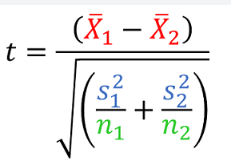

**Assumptions:**

    1 ) Data should be normally distributed (n>=30), if not then use **manWhitney-t-test**
    2 ) Independent Observation
    3 ) Data should be randomely sampled
    4 ) Both Group should have equal variance (Homoscedacity), use F-test or Levene's Test to validate that, if not equal variance the use **welch-t-test**


## Q1) Problem statement: 

    Compare the mean of ages of mens & Womans in titanic dataset, I'm saying the mean of man age > woman age, use alpha: significance level =0.05

In [75]:
# read the dataset 
df = pd.read_csv("./dataset/titanic.csv")
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [77]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [101]:
## Considering the total data is population (in real world we dont have population data, It's just for an example)
mens_age_pop = df[df['Sex'] == "male"]['Age'].dropna()
womens_age_pop = df[df['Sex'] == "female"]['Age'].dropna()

## popmean of woman & men (for testing)
mens_age_pop.mean(), womens_age_pop.mean()

# sampling the data
mens_sample = mens_age_pop.sample(30)
womens_sample = womens_age_pop.sample(30)

### validate the assumptions

#### **Normality test**

ShapiroResult(statistic=0.9526470047619907, pvalue=0.19893912159619015) ShapiroResult(statistic=0.9538378687222185, pvalue=0.21396133624500108)


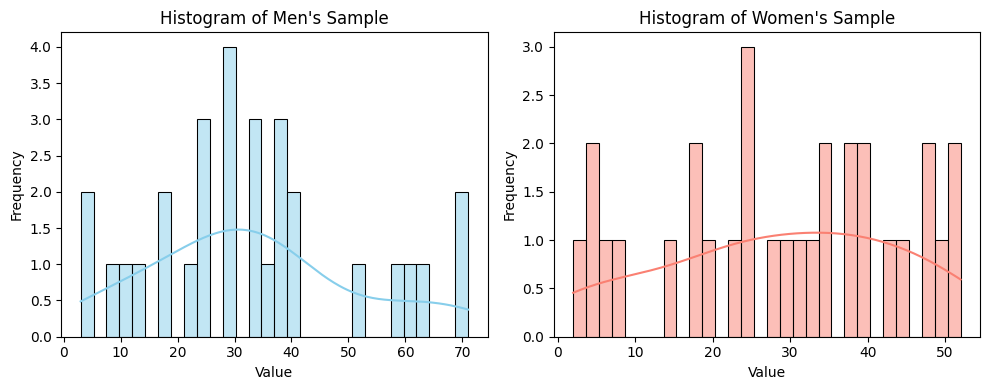

In [104]:
# ho = normally dist 
# h1 = not normally dist

mens_test= stats.shapiro(mens_sample)
woman_test = stats.shapiro(womens_sample)
print(mens_test, woman_test)
## In both data p < alpha, p > 0.05, hence we reject the Null Hypothesis


fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
sns.histplot(mens_sample, bins=30, color='skyblue', kde=True, edgecolor='black', ax=axes[0])
axes[0].set_title('Histogram of Men\'s Sample')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
sns.histplot(womens_sample, bins=30, color='salmon', kde=True, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram of Women\'s Sample')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **Variance test** (should be same)

In [103]:
stats.levene(mens_sample, womens_sample) ## validated p > 0.05

LeveneResult(statistic=0.30977370393107434, pvalue=0.5799603195433525)

#### As the  Assumptions are validated (we perform two sample independent t-test)

In [109]:
#Ho: mean age of men and female are same
#H1: mean age of men > mean age of female

t_statistic, p_value = stats.ttest_ind(mens_sample, womens_sample)
print(f"t_statistics : {t_statistic}")
print(f"p_value : {p_value/2}") #as it gives two sides area, here we're doing one sample test hence devide by 2

# decision
if p_value > 0.05:
    print("Not Reject the Ho: No strong evidence Against the Ho")
else:
    print("Reject the Ho: we have strong evidence against the Ho")

t_statistics : 1.01411797511333
p_value : 0.15736919733156574
Not Reject the Ho: No strong evidence Against the Ho


## **Q2:** 
Suppose website owner claims that there is no difference in the average time spend on their wesite between desktop & mobile users. To test this claim we collected 30 samples from each data, 

```python
desktop_users = [28.85336527, 24.34780133, 34.10957549, 24.62174765, 27.10459142,
       26.23301093, 21.87221482, 29.96068414, 34.5253182 , 24.9261139 ,
       23.49760607, 23.22485634, 15.53819053, 24.11093428, 26.25499058,
       30.27378963, 29.80023871, 22.91750459, 23.61588503, 30.61952653,
       24.13268051, 22.4498523 , 31.96259225, 30.18792834, 25.09395896,
       22.03111276, 14.9405984 , 27.94851803, 20.51815139, 15.18633995]

mobile_users= [37.50892316, 31.88780675, 21.16595084, 20.7135917 , 33.22577069,
       22.7321763 , 35.77689921, 31.69875588, 31.21957912, 30.42817273,
       29.14870523, 33.2830672 , 25.27551782, 28.51571184, 32.51167953,
       31.37793831, 20.83007917, 24.997542  , 29.51682103, 25.55191175,
       38.64795137, 25.64108083, 27.02668931, 32.61658107, 29.98319646,
       27.12835326, 23.46103883, 29.80908434, 34.23457864, 30.87457134]
```

In [114]:
## given data 
mobile_users= [37.50892316, 31.88780675, 21.16595084, 20.7135917 , 33.22577069,
       22.7321763 , 35.77689921, 31.69875588, 31.21957912, 30.42817273,
       29.14870523, 33.2830672 , 25.27551782, 28.51571184, 32.51167953,
       31.37793831, 20.83007917, 24.997542  , 29.51682103, 25.55191175,
       38.64795137, 25.64108083, 27.02668931, 32.61658107, 29.98319646,
       27.12835326, 23.46103883, 29.80908434, 34.23457864, 30.87457134]

desktop_users = [28.85336527, 24.34780133, 34.10957549, 24.62174765, 27.10459142,
       26.23301093, 21.87221482, 29.96068414, 34.5253182 , 24.9261139 ,
       23.49760607, 23.22485634, 15.53819053, 24.11093428, 26.25499058,
       30.27378963, 29.80023871, 22.91750459, 23.61588503, 30.61952653,
       24.13268051, 22.4498523 , 31.96259225, 30.18792834, 25.09395896,
       22.03111276, 14.9405984 , 27.94851803, 20.51815139, 15.18633995]

In [119]:
# normality test
from scipy.stats import shapiro
mobile_users_shapiro = shapiro(mobile_users)
desktop_users_shapiro = shapiro(desktop_users)

print(f"Mobile users shapiro test : {mobile_users_shapiro}")
print(f"desktop users shapiro test : {desktop_users_shapiro}")
## validated 

Mobile users shapiro test : ShapiroResult(statistic=0.9725374514624474, pvalue=0.610678577666361)
desktop users shapiro test : ShapiroResult(statistic=0.9576328810249685, pvalue=0.2691558712789486)


In [122]:
## variance test
from scipy.stats import levene
levene(mobile_users, desktop_users) # p>0.96 validated 

LeveneResult(statistic=0.0021090914942140837, pvalue=0.9635279112482573)

In [126]:
##t_test  (2sample_independat ttest)

#Ho: mobile_users= desktop users
#H1: mobile_users != desktop users

from scipy.stats import ttest_ind
t_statistics, p_value = ttest_ind(mobile_users, desktop_users)

print(f"t_statistics : {t_statistics}")
print(f"p_value : {p_value}") #As we're performing two tail test, dont devide, P_value by 2


# decision
if p_value > 0.05:
    print("Not Reject the Ho: No strong evidence Against the Ho")
else:
    print("Reject the Ho: The mean time spent on the website and mobile app are significantly different.")

t_statistics : 3.0580061234821247
p_value : 0.0033682895700252124
Reject the Ho: The mean time spent on the website and mobile app are significantly different.


# **Paired 2 sample ttest**

**A paired sample t-test is used when you have two related groups or measurements that are dependent on each other. For example, it can be used to compare the same group before and after a treatment (i.e., the same participants measured twice).**

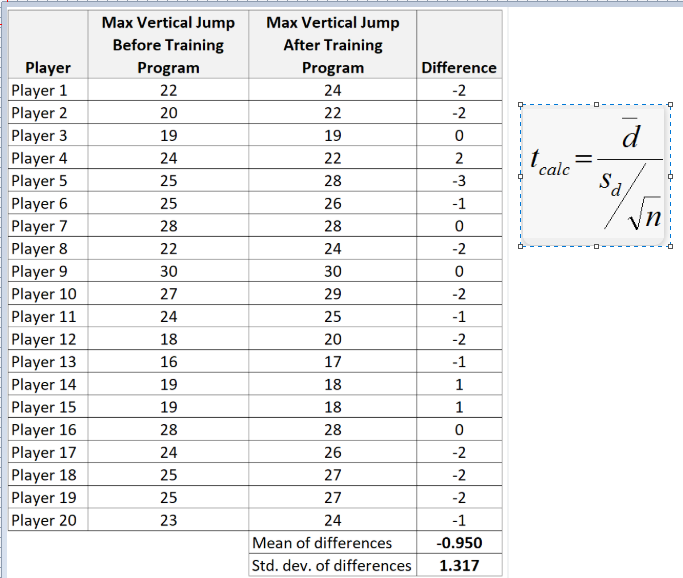

## **Q1**

**Scenario:**

Let's say you are testing the effectiveness of a new diet program. You collect data on the weight of 10 participants before and after the diet program. We want to know if the diet program resulted in a significant weight loss.

**Data:**

Before Diet: Weight of participants before starting the diet.

After Diet: Weight of participants after completing the diet.

In [127]:
import numpy as np
from scipy import stats

# Data for weight before and after the diet program (in kg)
before_diet = np.array([80, 90, 85, 88, 92, 78, 84, 86, 89, 93])  # Weights before the diet
after_diet = np.array([78, 86, 82, 85, 88, 76, 80, 84, 86, 90])   # Weights after the diet

# Perform paired sample t-test
t_statistic, p_value = stats.ttest_rel(before_diet, after_diet)

# Output the t-test results
print("Before Diet Weights:", before_diet)
print("After Diet Weights:", after_diet)
print("\nT-Statistic:", t_statistic)
print("P-Value:", p_value)

# Decision based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("\nReject the null hypothesis: The mean weight after the diet is significantly different from before.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in weight before and after the diet.")


Before Diet Weights: [80 90 85 88 92 78 84 86 89 93]
After Diet Weights: [78 86 82 85 88 76 80 84 86 90]

T-Statistic: 11.618950038622252
P-Value: 1.0131033233446437e-06

Reject the null hypothesis: The mean weight after the diet is significantly different from before.
